# Machine Learning Pipeline

In [44]:
!python --version

Python 3.9.13


In [45]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt

from pickle import load
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Float format
pd.options.display.float_format = '{:,.3g}'.format

# Loading the data

path_single_memristor = './data/Single_memristor_formfactor.dat'
path_coupled_memristor = './data/Coupled_memristors_formfactor.dat'
path_coupled_grid_memristor = './data/Coupled_memristors_formfactor_grid.dat'

with open(path_single_memristor, 'rb') as file:
    data_single, v_single, iqp_single, time_single, parameters_single, info_single = load(file)

with open(path_coupled_memristor, 'rb') as file:
    data_coupled, v_coupled, iqp_coupled, time_coupled, parameters_coupled, info_coupled = load(file)

with open(path_coupled_grid_memristor, 'rb') as file:
    data_coupled_grid, v_coupled_grid, iqp_coupled_grid, time_coupled_grid, parameters_coupled_grid, info_coupled_grid = load(file)

df_single = pd.DataFrame(data_single)
df_coupled = pd.DataFrame(data_coupled)
df_grid = pd.DataFrame(data_coupled_grid)


In [46]:
# Description of Dataset Single

df_single.describe()
#print(df_single.describe().to_latex())

,theta_2,alpha,Formfactor
count,2e+03,2e+03,2e+03
mean,3.09,50.1,0.182
std,1.79,29.2,0.0858
min,0.0135,0.177,0.0013
25%,1.5,24.9,0.125
50%,3.13,49.7,0.177
75%,4.62,75.7,0.253
max,6.22,100,0.324


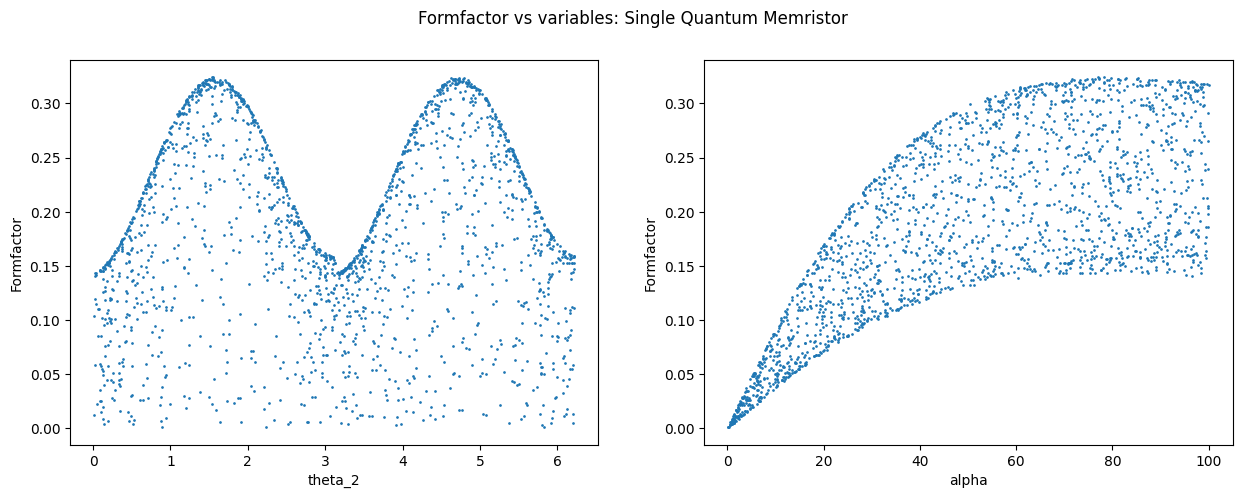

In [47]:
# Plots Single Form Factor vs parameters
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
df = df_single
df.plot(x='theta_2', y='Formfactor', kind='scatter', s=.9, ax=axes[0])
df.plot(x='alpha', y='Formfactor', kind='scatter', s=.9, ax=axes[1])
#axes[0].set_xlabel("$\\theta_2$")
#axes[1].set_xlabel("$\\alpha$")
plt.suptitle("Formfactor vs variables: Single Quantum Memristor")
fig.savefig('./figures/singleqm_ff.pdf')
plt.show()

In [48]:
# Description of Dataset Coupled

df_coupled.describe()


,C12,L12,theta,lambda_,Formfactor_1,Formfactor_2
count,5e+03,5e+03,5e+03,5e+03,5e+03,5e+03
mean,1e-12,1.01e-08,3.13,50.6,0.233,0.233
std,5.76e-13,5.77e-09,1.79,29.2,0.0471,0.0471
min,2.6e-16,1.38e-12,0.0112,0.113,0.132,0.132
25%,4.96e-13,5.22e-09,1.57,25.4,0.199,0.199
50%,1e-12,9.98e-09,3.12,51,0.229,0.229
75%,1.5e-12,1.51e-08,4.71,76.5,0.263,0.263
max,2e-12,2e-08,6.22,100,0.503,0.503


In [49]:
df_grid.describe()

,C12,L12,theta,lambda_,Formfactor_1,Formfactor_2
count,1e+04,1e+04,1e+04,1e+04,1e+04,1e+04
mean,1e-12,1e-08,3.12,50,0.229,0.229
std,6.38e-13,6.38e-09,1.98,31.9,0.0524,0.0524
min,0,0,0.01,0.1,0.138,0.138
25%,4.44e-13,4.44e-09,1.39,22.3,0.19,0.19
50%,1e-12,1e-08,3.12,50,0.223,0.223
75%,1.56e-12,1.56e-08,4.84,77.8,0.263,0.263
max,2e-12,2e-08,6.22,100,0.477,0.477


In [50]:
df_coupled = pd.concat([df_grid,df_coupled])
df_coupled.describe()


,C12,L12,theta,lambda_,Formfactor_1,Formfactor_2
count,1.5e+04,1.5e+04,1.5e+04,1.5e+04,1.5e+04,1.5e+04
mean,1e-12,1e-08,3.12,50.2,0.231,0.231
std,6.18e-13,6.19e-09,1.92,31,0.0507,0.0507
min,0,0,0.01,0.1,0.132,0.132
25%,4.44e-13,4.44e-09,1.39,22.3,0.194,0.194
50%,1e-12,9.98e-09,3.12,51,0.225,0.225
75%,1.56e-12,1.56e-08,4.84,77.8,0.263,0.263
max,2e-12,2e-08,6.22,100,0.503,0.503


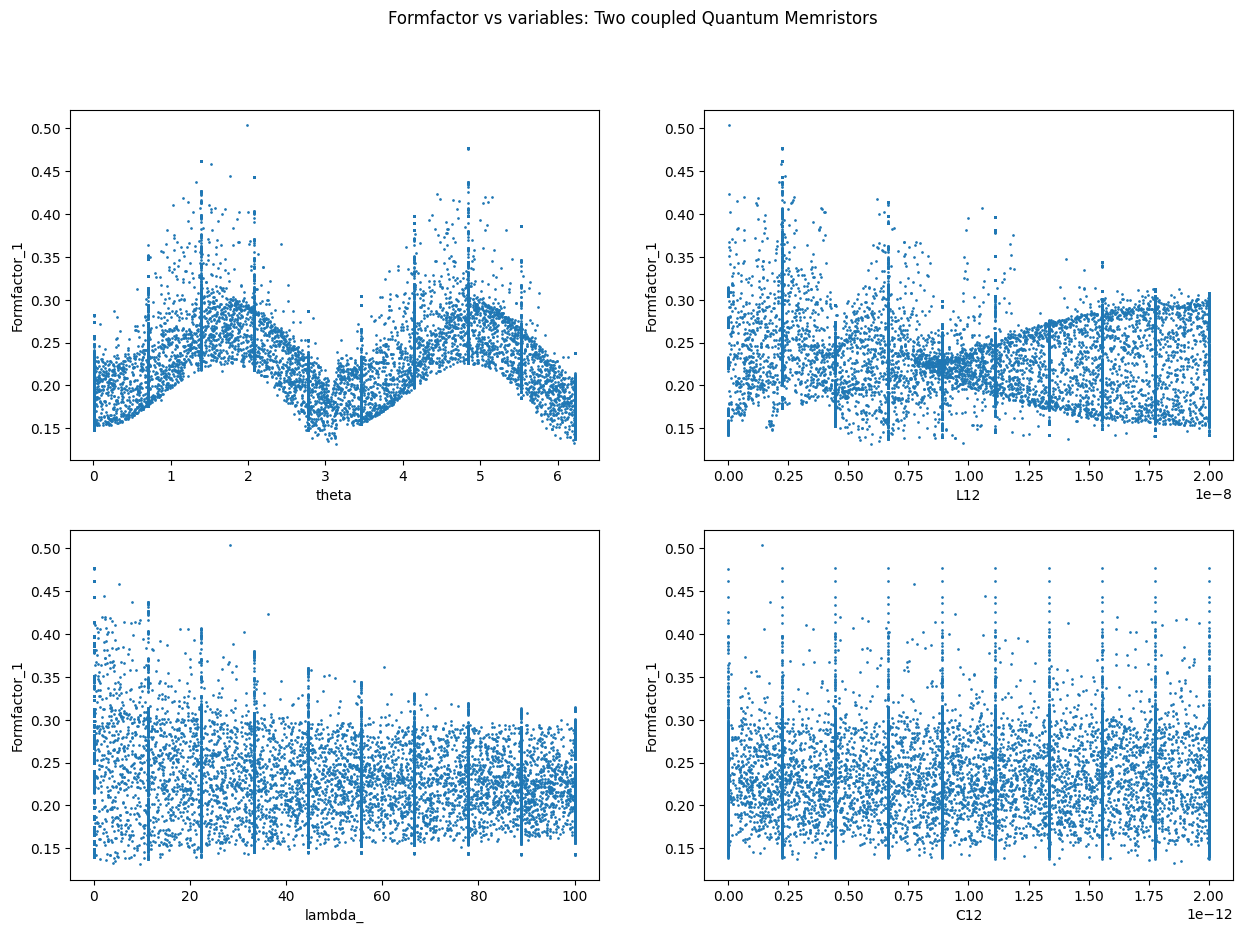

In [38]:
# Plots Single Form Factor vs parameters
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
df = df_coupled
df.plot(x='theta', y='Formfactor_1', kind='scatter', s=.9, ax=axes[0,0])
#df.plot(x='theta', y='Formfactor_2', kind='scatter', s=.9, ax=axes[0,1])
df.plot(x='lambda_', y='Formfactor_1', kind='scatter', s=.9, ax=axes[1,0])
#df.plot(x='lambda_', y='Formfactor_2', kind='scatter', s=.9, ax=axes[1,1])
df.plot(x='L12', y='Formfactor_1', kind='scatter', s=.9, ax=axes[0,1])
#df.plot(x='L12', y='Formfactor_2', kind='scatter', s=.9, ax=axes[2,1])
df.plot(x='C12', y='Formfactor_1', kind='scatter', s=.9, ax=axes[1,1])
#df.plot(x='C12', y='Formfactor_2', kind='scatter', s=.9, ax=axes[3,1])
plt.suptitle("Formfactor vs variables: Two coupled Quantum Memristors")
fig.savefig('./figures/coupledqm_ff.pdf')
plt.show()

In [39]:
# Training Models
xcols_single = df_single.columns[0:2]
xcols_coupled = df_coupled.columns[0:4]

y_single, X_single = df_single.loc[:, df_single.columns[-1]].to_numpy(), df_single.loc[:, xcols_single].to_numpy()
y_coupled, X_coupled = df_coupled.loc[:, df_coupled.columns[-1]].to_numpy(), df_coupled.loc[:, xcols_coupled].to_numpy()

random_state = 42
test_size = 0.33

x_train_single, x_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.33, random_state=42)
x_train_coupled, x_test_coupled, y_train_coupled, y_test_coupled = train_test_split(X_coupled, y_coupled, test_size=0.33, random_state=42)

In [40]:
# Training Single QM

reg_single = LazyRegressor(ignore_warnings=False, custom_metric=None)
models_single, predictions_single = reg_single.fit(x_train_single, x_test_single, y_train_single, y_test_single)
models_single.head(10)

100%|██████████| 38/38 [00:02<00:00, 17.47it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,1,1,0.00103,0.104
NuSVR,0.999,0.999,0.00229,0.436
HistGradientBoostingRegressor,0.998,0.998,0.00373,0.379
LGBMRegressor,0.998,0.998,0.00375,0.182
ExtraTreesRegressor,0.997,0.997,0.00421,0.128
RandomForestRegressor,0.997,0.997,0.00458,0.198
BaggingRegressor,0.996,0.996,0.00532,0.0245
XGBRegressor,0.995,0.995,0.00586,0.139
KNeighborsRegressor,0.994,0.994,0.00635,0.00472


In [42]:
# Training 2 Coupled QM

reg_coupled = LazyRegressor(ignore_warnings=False, custom_metric=None)
models_coupled, predictions_coupled = reg_coupled.fit(x_train_coupled, x_test_coupled, y_train_coupled, y_test_coupled)
models_coupled.head(10)

100%|██████████| 38/38 [00:21<00:00,  1.78it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.979,0.979,0.00743,0.986
XGBRegressor,0.977,0.977,0.00786,0.274
RandomForestRegressor,0.974,0.974,0.00831,1.59
BaggingRegressor,0.971,0.971,0.0087,0.162
LGBMRegressor,0.97,0.97,0.00891,0.154
HistGradientBoostingRegressor,0.967,0.967,0.00935,0.437
DecisionTreeRegressor,0.946,0.946,0.0119,0.0373
ExtraTreeRegressor,0.933,0.933,0.0133,0.0331
KNeighborsRegressor,0.854,0.854,0.0197,0.0401
